In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [1]:
import nbformat

with open("benin_eda.ipynb", "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)
print(" Notebook is valid.")



 Notebook is valid.


In [6]:
df = pd.read_csv('../data/benin-malanville.csv')
df.head(500)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2021-08-09 08:16,371.1,373.2,218.2,306.4,309.8,25.8,91.2,1.2,2.4,0.9,177.5,8.6,998,0,0.0,39.6,36.6,NaN
496,2021-08-09 08:17,396.7,417.6,224.0,326.5,330.2,25.9,91.5,2.1,2.6,0.5,181.4,7.4,998,0,0.0,41.0,37.4,NaN
497,2021-08-09 08:18,376.9,358.8,226.7,312.6,316.4,26.0,90.8,1.9,2.6,0.5,188.5,13.7,998,0,0.0,42.2,37.9,NaN
498,2021-08-09 08:19,321.3,227.1,224.1,267.6,270.9,26.1,90.0,1.4,1.9,0.5,199.1,11.3,998,0,0.0,43.3,38.6,NaN


In [7]:

df.describe()

# For calculating the Missing values
df.isna().sum()

# Columns with >5% missing
missing = df.isna().mean()
missing[missing > 0.05]


Comments    1.0
dtype: float64

In [8]:
z_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[z_cols].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)

# Remove outliers
df_clean = df[~outliers].copy()
print(f"Removed {outliers.sum()} outliers from the dataset.")
# df_outliers = df[outliers]
# print(df_outliers)


Removed 7740 outliers from the dataset.


In [9]:
# Fill missing values in all columns except the first (e.g., timestamp)
df_clean.iloc[:, 1:] = df_clean.iloc[:, 1:].fillna(df_clean.iloc[:, 1:].median())



In [27]:
df_clean.shape
df_clean.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [11]:
df_clean.to_csv('../data/benin_clean.csv', index=False)


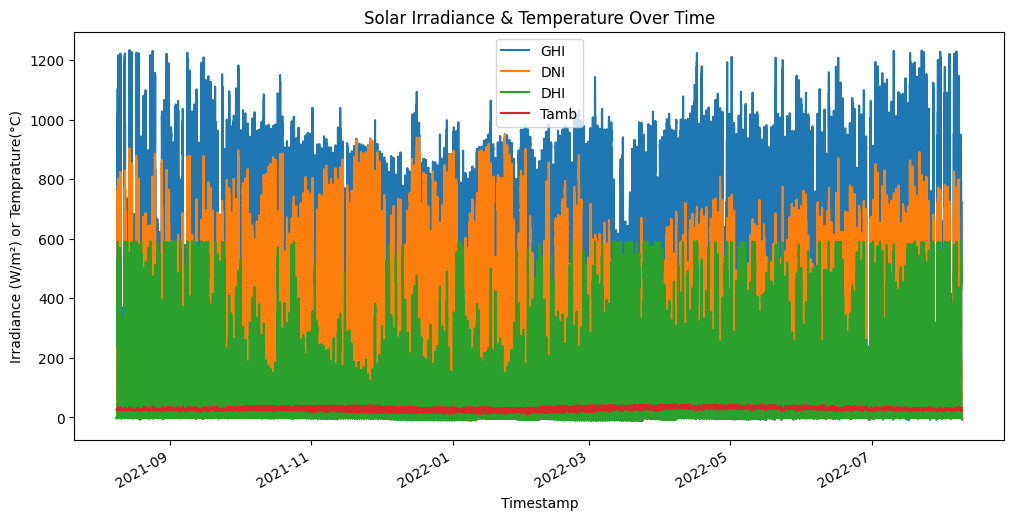

In [12]:

df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12,6))
plt.title("Solar Irradiance & Temperature Over Time")
plt.ylabel('Irradiance (W/m²) or Temprature(°C)')
plt.show()


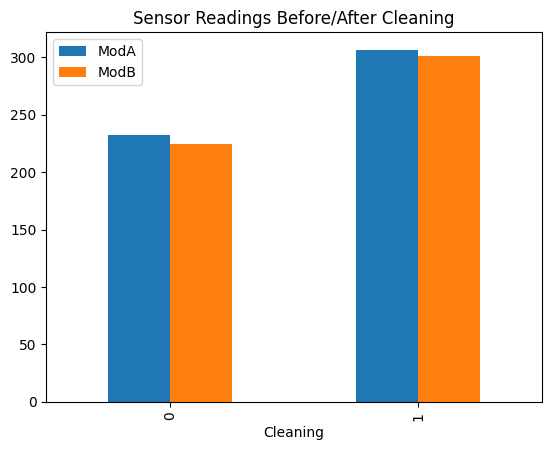

In [13]:
#cleaning impact analysis
# Compare ModA and ModB before and after cleaning
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Sensor Readings Before/After Cleaning")
plt.show()


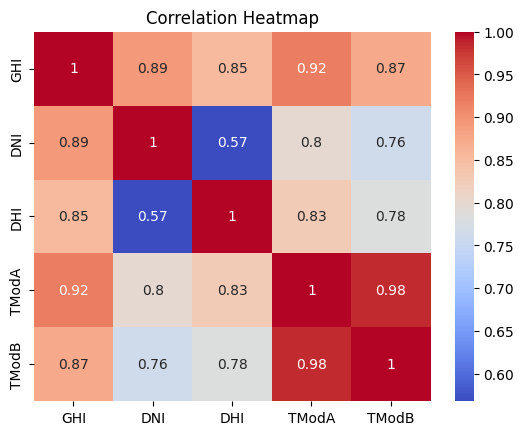

In [14]:
#Correlation & Relationship Analysis

corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


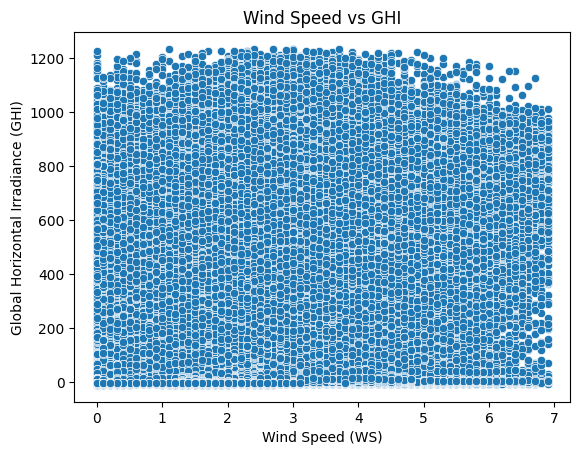

In [15]:
sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title("Wind Speed vs GHI")
plt.xlabel("Wind Speed (WS)")
plt.ylabel("Global Horizontal Irradiance (GHI)")
plt.show()


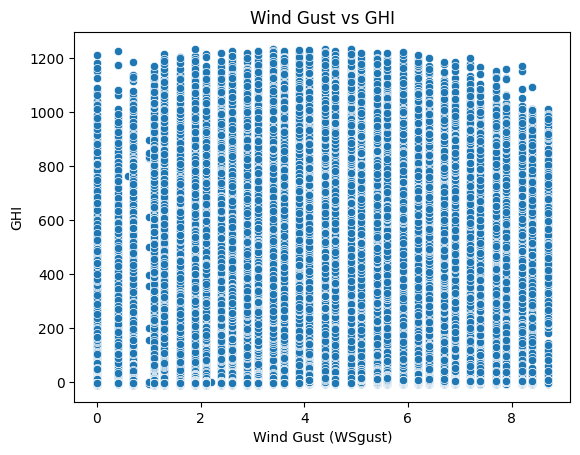

In [16]:
sns.scatterplot(x='WSgust', y='GHI', data=df_clean)
plt.title("Wind Gust vs GHI")
plt.xlabel("Wind Gust (WSgust)")
plt.ylabel("GHI")
plt.show()


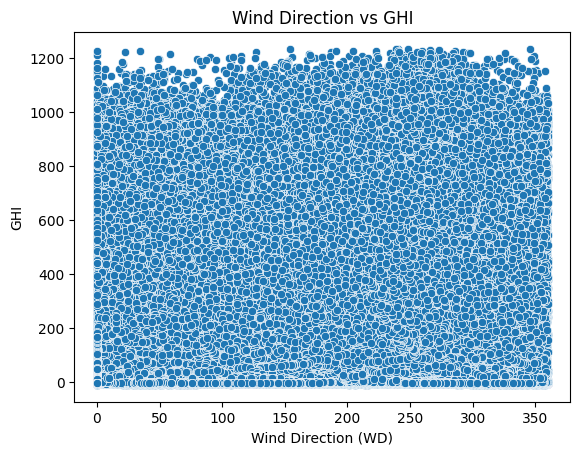

In [17]:
sns.scatterplot(x='WD', y='GHI', data=df_clean)
plt.title("Wind Direction vs GHI")
plt.xlabel("Wind Direction (WD)")
plt.ylabel("GHI")
plt.show()


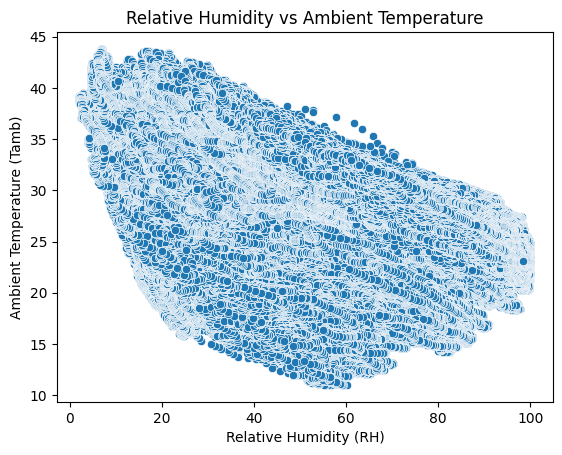

In [18]:
sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title("Relative Humidity vs Ambient Temperature")
plt.xlabel("Relative Humidity (RH)")
plt.ylabel("Ambient Temperature (Tamb)")
plt.show()


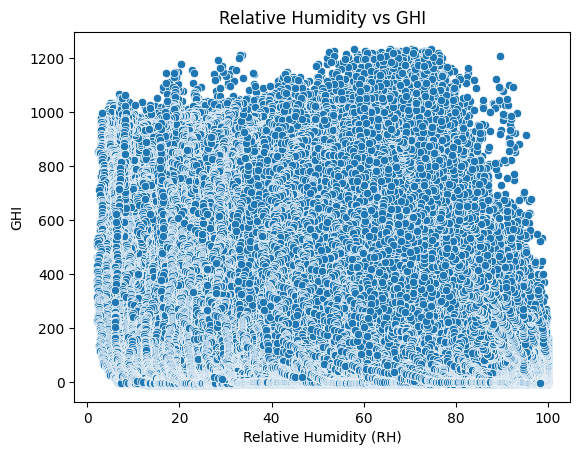

In [19]:
sns.scatterplot(x='RH', y='GHI', data=df_clean)
plt.title("Relative Humidity vs GHI")
plt.xlabel("Relative Humidity (RH)")
plt.ylabel("GHI")
plt.show()


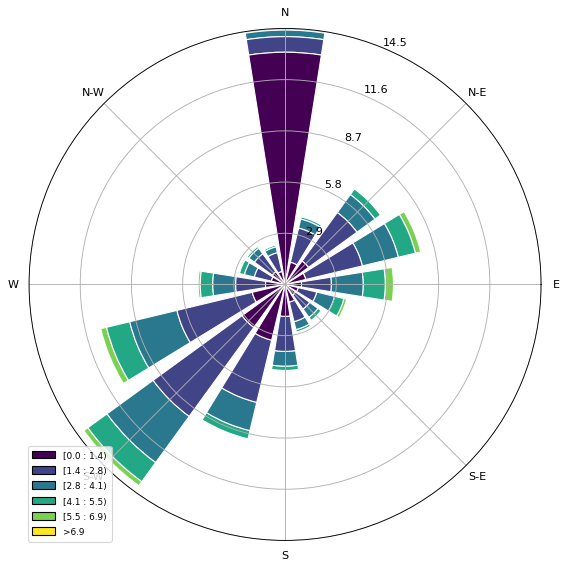

In [20]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()


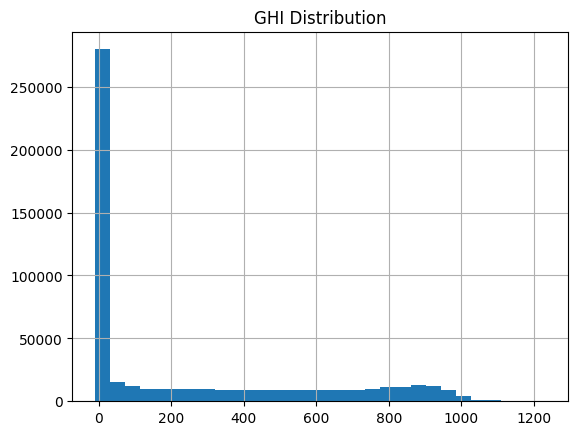

In [22]:
#Histogram for GHI distribution
df_clean['GHI'].hist(bins=30)
plt.title("GHI Distribution")
plt.show()


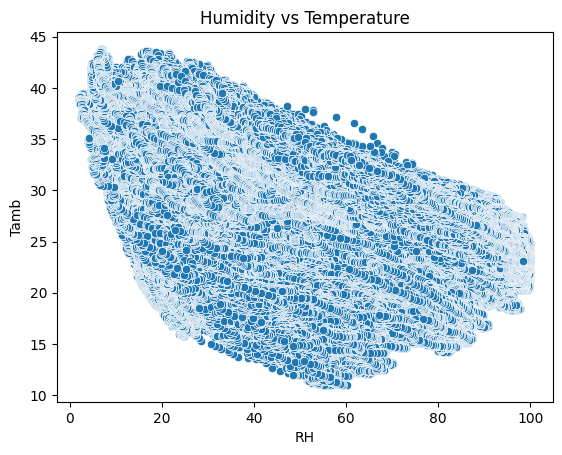

In [24]:
#the influence of relative humidity on the temperature
sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title("Humidity vs Temperature")
plt.show()


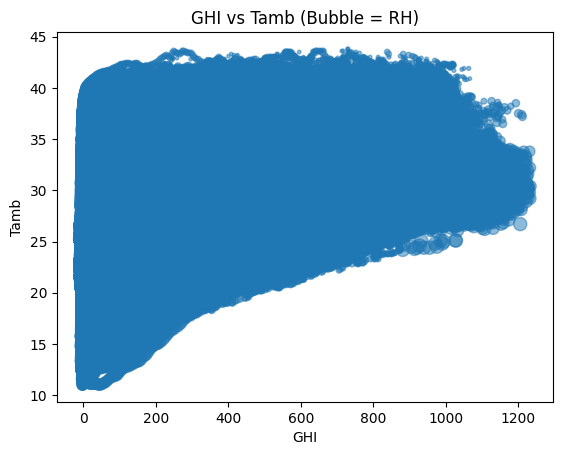

In [25]:
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH'], alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs Tamb (Bubble = RH)")
plt.show()
